<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/10_Lite_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(%D0%A3%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B8%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Lite
Макс 10 баллов

Провести серию экспериментов по подбору гиперпараметров нейронной сети, созданной на занятии (можно использовать любую нейросеть с занятия, либо создать свою свёрточную сеть).

Поменять количество нейронов (фильтров) в скрытом сверточном слое и обучить сеть, использовав следующие значения:

○ первая сеть - скрытый слой 2 нейрона

○ вторая сеть - тот же скрытый слой 4 нейрона

○ третья сеть - тот же скрытый слой 16 нейронов

Поменять активационную функцию в скрытых слоях с relu на linear
Поменять размеры batch_size:

○ 10

○ 100

○ Вся база (50000)

Записать в таблицу получившиеся точности.
Написать выводы по результатам проведенных тестов.
 

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os
from google.colab import drive

%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Распознавание изображений из набора данных MNIST 


In [ ]:
# mnist загрузка базы
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

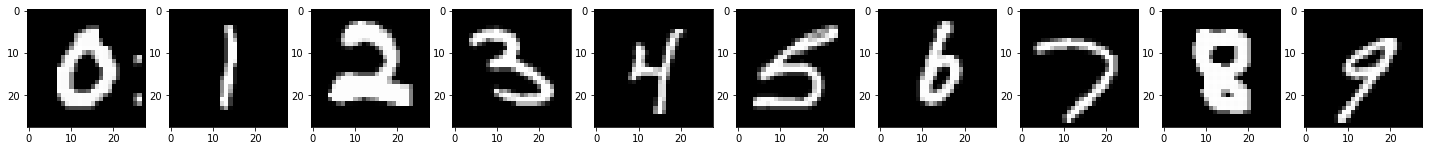

In [ ]:
# Выводим картинки для каждого класса (примеры)
fig,axs = plt.subplots(1, 10, figsize=(25, 3))    #создаем полотно из 10 графиков
for i in range(10):
  label_indexes = np.where(y_train==i)[0]         #получаем список из индексов положений класса i в y_train 
  index = random.choice(label_indexes)            # выбираем рандомно индекс
  img = x_train[index]                            # выбираем картинку из x_train
  axs[i].imshow(Image.fromarray(img), cmap='gray') #отображаем картинку i-тым

plt.show()                                        #показать картинку

In [ ]:
# преобразуем y_train, y_test в ohe
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test, 10)


In [ ]:
#меняем размерность, добавляем в конце 1, чтобы сверточная сеть понимала, что это черно-белые
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# проверим размерность и глянем на правильных ответах
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


# Функция создания сети + обучение в цикле :
- 2, 4, 16 неронов
- активация 'linear', 'relu'
- batch_size : 1000, 100, 10 . Здесь не хватило ресурса для batch_size = 50000

In [ ]:
# Функция создания сети

def createModel(n, act):
  model = Sequential()

  #Первый сверточный слой
  model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation= act))

  #второй сверточный слой
  model.add(Conv2D(n, (3, 3), padding = 'same', activation = act))

  #Полносвязный слой для классификации
  model.add(Dense(40, activation= act))

  model.add(Flatten())

  #выходной полносвязный слой
  model.add(Dense(10, activation='softmax'))

  #компилируем сеть
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  return model

In [ ]:
def RunModel(batch_s):                                                          #Создаем функцию обучения и обработки тестовых данных
  
  history= model.fit(x_train, 
                    y_train, 
                    batch_size=batch_s, 
                    epochs=15,
                    validation_split=0.1,                                       #Делаем проверочную выборку 10% от обучающей
                    verbose=0)
 
 # Вычисляем результаты сети на тестовом наборе
# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
  scores = model.evaluate(x_test, y_test, verbose=0)

 # print(scores)
  print("кол-во нейронов в скрытом слое: ", n)
  print("activation: ", act)
  print("batch_size: ", batch_s)
  print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

  if round(scores[1] * 100, 4) > 95 :                                           #Просим сохранить модели НС, которые дали результат более 95%
    model.save_weights(str(act)+'_'+str(n) + '_' + str(batch_s) + '_' + 'model_weights.h5')

In [ ]:
for n in [2, 4, 16]:                         #Запускаем в цикле создание НС , в списке указываем кол-во нейронов во внутреннем слое
  for act in ['linear', 'relu']:             #Далее обходим список с типом активации для каждой модели
    createModel(n, act)                      #Запускаем функцию создания модели, где обозначаем переменной n=кол-во нейронов, act=способ активации     
    for batch_s in [1000, 100, 10]:          #Далее для обучения обходим список из 3х вариантов batch_size (первый показатель взят исходя из ресурсов colab, 50 000 - не получилось применить)
      for number in range(3):                #Делаем три запуска, для определения лучшего результата по каждому эксперименту
        RunModel(batch_s)                    #Запускаем функцию обучения и обработки тестовых данных


кол-во нейронов в скрытом слое:  2
activation:  linear
batch_size:  1000
Доля верных ответов на тестовых данных, в процентах: 96.71%
кол-во нейронов в скрытом слое:  2
activation:  linear
batch_size:  1000
Доля верных ответов на тестовых данных, в процентах: 96.68%
кол-во нейронов в скрытом слое:  2
activation:  linear
batch_size:  1000
Доля верных ответов на тестовых данных, в процентах: 96.67%
кол-во нейронов в скрытом слое:  2
activation:  linear
batch_size:  100
Доля верных ответов на тестовых данных, в процентах: 96.0%
кол-во нейронов в скрытом слое:  2
activation:  linear
batch_size:  100
Доля верных ответов на тестовых данных, в процентах: 96.56%
кол-во нейронов в скрытом слое:  2
activation:  linear
batch_size:  100
Доля верных ответов на тестовых данных, в процентах: 96.25%
кол-во нейронов в скрытом слое:  2
activation:  linear
batch_size:  10
Доля верных ответов на тестовых данных, в процентах: 96.15%
кол-во нейронов в скрытом слое:  2
activation:  linear
batch_size:  10
Доля

In [ ]:
# Таблица результатов точности на тестовой выборке , %
import pandas as pd
columns = ['Наименование эксперимента', '2 нейрона скрытый слой', '4 нейрона скрытый слой', '16 нейронов скрытый слой']
data = [['activation = linear, batch_size = 1000', 96.71, 96.42, 96.28],
        ['activation = linear, batch_size = 100', 96.56, 96.57, 96.27], 
        ['activation = linear, batch_size = 10', 96.46, 96.41, 96.19],
       ['activation = relu, batch_size = 1000', 96.53, 96.53, 96.17],
       ['activation = relu, batch_size = 100', 96.6, 96.49, 96.21],
        ['activation = relu, batch_size = 10', 96.36, 96.16, 96.33]]
df = pd.DataFrame(data, columns = columns)
df

,Наименование эксперимента,2 нейрона скрытый слой,4 нейрона скрытый слой,16 нейронов скрытый слой
0,"activation = linear, batch_size = 1000",96.71,96.42,96.28
1,"activation = linear, batch_size = 100",96.56,96.57,96.27
2,"activation = linear, batch_size = 10",96.46,96.41,96.19
3,"activation = relu, batch_size = 1000",96.53,96.53,96.17
4,"activation = relu, batch_size = 100",96.60,96.49,96.21
5,"activation = relu, batch_size = 10",96.36,96.16,96.33


In [ ]:
df.describe()

,2 нейрона скрытый слой,4 нейрона скрытый слой,16 нейронов скрытый слой
count,6.000000,6.000000,6.000000
mean,96.536667,96.430000,96.241667
std,0.119778,0.146014,0.061455
min,96.360000,96.160000,96.170000
25%,96.477500,96.412500,96.195000
50%,96.545000,96.455000,96.240000
75%,96.590000,96.520000,96.277500
max,96.710000,96.570000,96.330000


Вывод: Неожиданно , но лучше всех отработала нейронка со крытым слоем в 2 нейрона. Здесь самые высокие показатели точности практически во всех экспериментах. Также стоит отметить здесь дисперсия результатов точности небольшая, данные близки по значению во всех экспериментах. 
Наименьшая точность достигнута на нейронке со скрытым слоем 16 нейронов, что также удивило :)
Резюме: начинать моделирование от простого к сложному, касательно архитектуры. На больших базах хорошо работает большой batch_size. Способ активации linear сработал немного лучше , чем relu в задаче классификации изображений.

Примечание: Поскольку был выделен недостаточный ресурс в colab, код обрабатывался очень долго и не получилось взять пакет на 50000 для batch_size.